In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
master_df = pd.read_csv('master_df.csv', index_col = 0)

In [3]:
master_df.head()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,HR/PA
0,514888,580,10.5,31.6,106.5,85.8,90.2,83.2,410,159,...,0.812,125.0,293,17,9,3,6,8,*4/D,0.033473
1,444876,553,8.3,31.1,106.2,83.5,86.5,81.9,407,154,...,0.614,67.0,196,10,8,11,5,1,*6,0.010264
2,466320,553,9.5,31.6,111.0,89.4,91.2,89.8,455,163,...,0.709,97.0,248,18,2,2,10,2,*7/D,0.021672
3,435079,549,17.4,37.5,105.5,85.6,88.6,83.2,407,189,...,0.770,112.0,267,13,3,0,5,0,*4/D,0.041237
4,519184,536,3.9,35.1,111.4,82.1,86.0,79.7,389,132,...,0.719,98.0,223,5,2,5,3,0,*789,0.005333


In [4]:
master_df.columns

Index(['player_id', 'attempts', 'avg_hit_angle', 'anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa', 'full_name', 'year', 'pa', 'bip', 'ba',
       'est_ba', 'est_ba_minus_ba_diff', 'slg', 'est_slg',
       'est_slg_minus_slg_diff', 'woba', 'est_woba',
       'est_woba_minus_woba_diff', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'PA▼', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos Summary', 'HR/PA'],
      dtype='object')

In [5]:
obvious_drop = ['player_id', 'attempts', 'Rk', 'full_name', 'year', 'pa', 'bip', 'est_ba_minus_ba_diff', 'est_slg_minus_slg_diff', 'est_woba_minus_woba_diff', 'Lg', 'G', 'AB', 'R', 'H', '2B', '3B', 'BB', 'SB', 'CS', 'OPS+', 'TB', 'GDP', 'HBP', 'Pos Summary', 'ev95plus', 'barrels', 'brl_percent']

In [6]:
master_df_2 = master_df.drop(obvious_drop, axis = 1)

In [7]:
master_df_2.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'max_hit_speed',
       'avg_hit_speed', 'fbld', 'gb', 'max_distance', 'avg_distance',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'PA▼', 'HR', 'RBI', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'SH', 'SF', 'IBB', 'HR/PA'],
      dtype='object')

In [8]:
master_df_2['RBI/PA'] = master_df_2['RBI'] / master_df_2['PA▼']

In [9]:
master_df_2['SO/PA'] = master_df_2['SO'] / master_df_2['PA▼']

In [10]:
master_df_2['SH/PA'] = master_df_2['SH'] / master_df_2['PA▼']

In [11]:
master_df_2['SF/PA'] = master_df_2['SF'] / master_df_2['PA▼']

In [12]:
master_df_2['IBB/PA'] = master_df_2['IBB'] / master_df_2['PA▼']

In [13]:
master_df_2['CHR_per_PA'] = master_df_2['HR'] / master_df_2['PA▼']

In [14]:
master_df_2.drop(['RBI', 'SO', 'SH', 'SF', 'IBB', 'PA▼'], axis = 1, inplace = True)

In [15]:
master_df_2.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'max_hit_speed',
       'avg_hit_speed', 'fbld', 'gb', 'max_distance', 'avg_distance',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'HR', 'BA', 'OBP', 'SLG',
       'OPS', 'HR/PA', 'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA',
       'CHR_per_PA'],
      dtype='object')

In [16]:
# list of numerical variables
num_vars = [var for var in master_df_2.columns if master_df_2[var].dtypes != 'O']

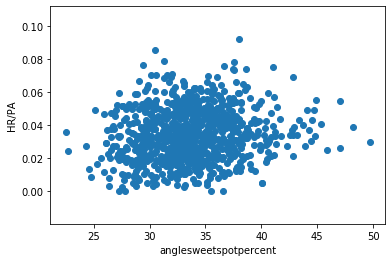

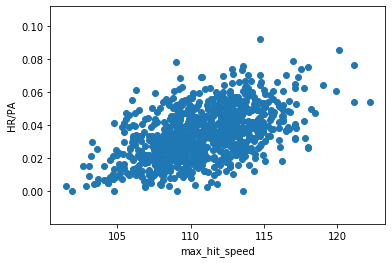

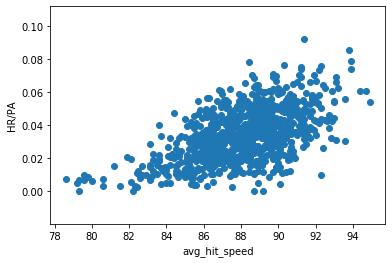

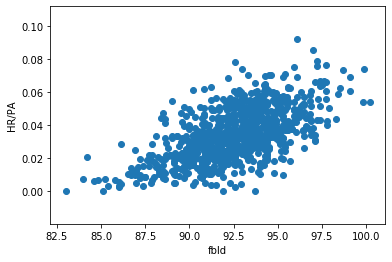

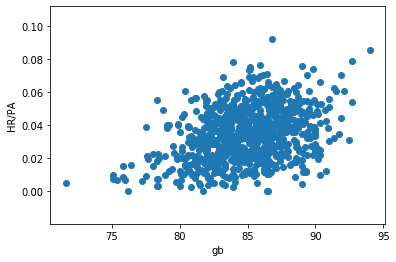

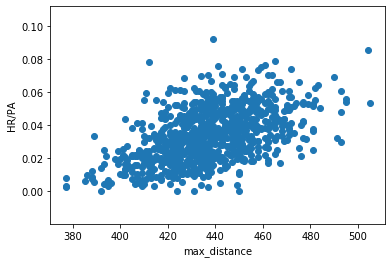

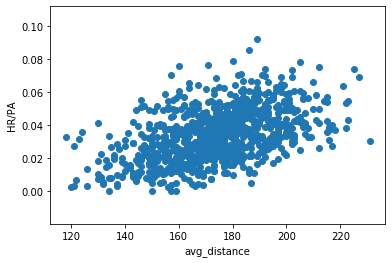

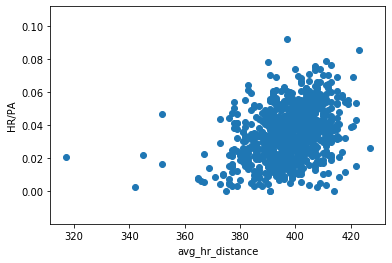

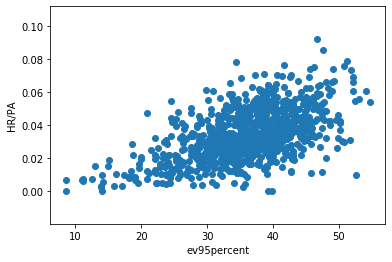

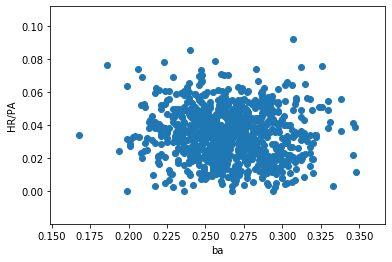

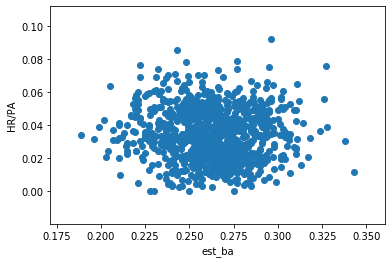

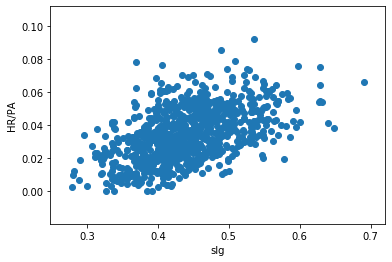

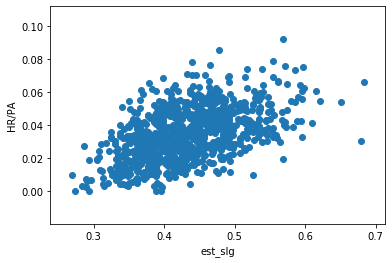

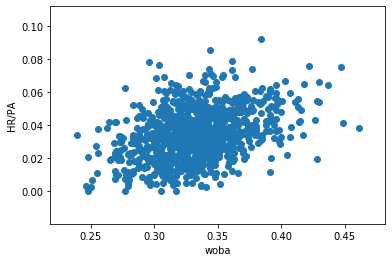

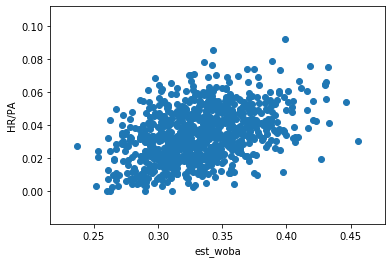

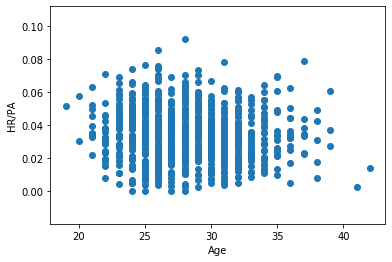

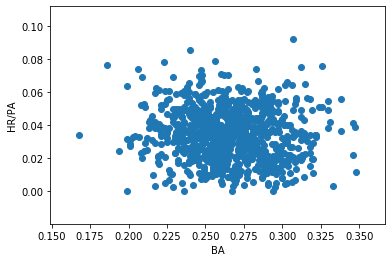

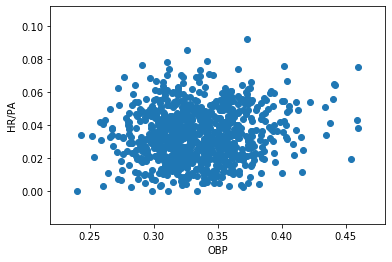

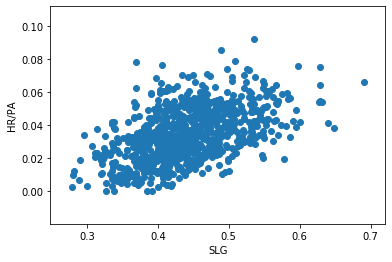

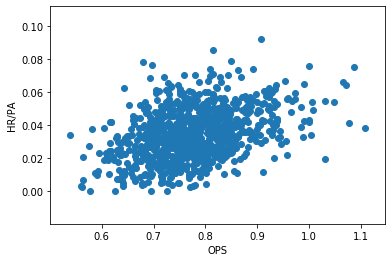

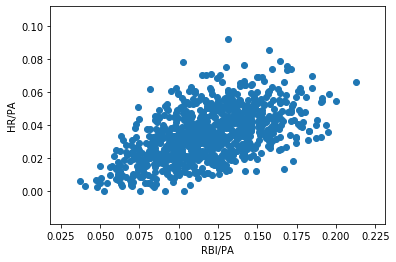

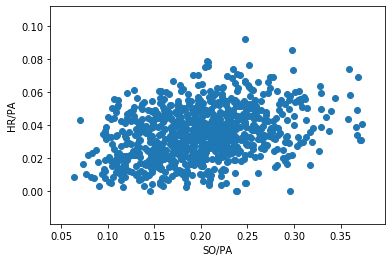

In [17]:
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        plt.scatter(df[var], df['HR/PA'])
        plt.ylabel('HR/PA')
        plt.xlabel(var)
        plt.show()
    
for var in num_vars:
    if var !='HR/PA':
        transform_analyse_continous(master_df_2, var)

In [18]:
in_depth_drop_list = ['max_hit_speed', 'fbld', 'gb', 'max_distance', 'avg_distance', 'ba', 'est_ba', 'slg', 'woba', 'BA', 'SLG']

In [19]:
master_df_3 = master_df_2.drop(in_depth_drop_list, axis = 1)

In [20]:
master_df_3.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'est_slg', 'est_woba',
       'Age', 'Tm', 'HR', 'OBP', 'OPS', 'HR/PA', 'RBI/PA', 'SO/PA', 'SH/PA',
       'SF/PA', 'IBB/PA', 'CHR_per_PA'],
      dtype='object')

In [21]:
master_df_3.shape

(860, 20)

In [22]:
#create angle sweet spot index. 1 for less than 28 degrees, 2 for between 28 and 35 degrees, 3 for more than 35 degrees
master_df_3['angle_sweet_spot_index'] = master_df_3['anglesweetspotpercent'].apply(lambda x: 1 if x < 28 else ( 2 if 28 <= x <= 35 else 3))

In [23]:
#create dummy variables for angle sweet spot index
sweet_spot_dummies = pd.get_dummies(master_df_3.angle_sweet_spot_index, drop_first=True, prefix='AS_')

In [24]:
master_df_4 = pd.concat([master_df_3, sweet_spot_dummies], axis=1)


In [25]:
#create dummy variables for sacrifice hits
team_dummies = pd.get_dummies(master_df_4.Tm, drop_first=True, prefix='Tm_')
team_dummies

,Tm__ATL,Tm__BAL,Tm__BOS,Tm__CHC,Tm__CHW,Tm__CIN,Tm__CLE,Tm__COL,Tm__DET,Tm__HOU,...,Tm__PIT,Tm__SDP,Tm__SEA,Tm__SFG,Tm__STL,Tm__TBR,Tm__TEX,Tm__TOR,Tm__TOT,Tm__WSN
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
master_df_5 = pd.concat([master_df_4, team_dummies], axis = 1)

In [27]:
master_df_5.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'est_slg', 'est_woba',
       'Age', 'Tm', 'HR', 'OBP', 'OPS', 'HR/PA', 'RBI/PA', 'SO/PA', 'SH/PA',
       'SF/PA', 'IBB/PA', 'CHR_per_PA', 'angle_sweet_spot_index', 'AS__2',
       'AS__3', 'Tm__ATL', 'Tm__BAL', 'Tm__BOS', 'Tm__CHC', 'Tm__CHW',
       'Tm__CIN', 'Tm__CLE', 'Tm__COL', 'Tm__DET', 'Tm__HOU', 'Tm__KCR',
       'Tm__LAA', 'Tm__LAD', 'Tm__MIA', 'Tm__MIL', 'Tm__MIN', 'Tm__NYM',
       'Tm__NYY', 'Tm__OAK', 'Tm__PHI', 'Tm__PIT', 'Tm__SDP', 'Tm__SEA',
       'Tm__SFG', 'Tm__STL', 'Tm__TBR', 'Tm__TEX', 'Tm__TOR', 'Tm__TOT',
       'Tm__WSN'],
      dtype='object')

In [28]:
master_df_6 = master_df_5.drop(['Tm', 'angle_sweet_spot_index', 'anglesweetspotpercent'], axis = 1)

In [29]:
master_df_6.columns

Index(['avg_hit_angle', 'avg_hit_speed', 'avg_hr_distance', 'ev95percent',
       'brl_pa', 'est_slg', 'est_woba', 'Age', 'HR', 'OBP', 'OPS', 'HR/PA',
       'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA', 'AS__2',
       'AS__3', 'Tm__ATL', 'Tm__BAL', 'Tm__BOS', 'Tm__CHC', 'Tm__CHW',
       'Tm__CIN', 'Tm__CLE', 'Tm__COL', 'Tm__DET', 'Tm__HOU', 'Tm__KCR',
       'Tm__LAA', 'Tm__LAD', 'Tm__MIA', 'Tm__MIL', 'Tm__MIN', 'Tm__NYM',
       'Tm__NYY', 'Tm__OAK', 'Tm__PHI', 'Tm__PIT', 'Tm__SDP', 'Tm__SEA',
       'Tm__SFG', 'Tm__STL', 'Tm__TBR', 'Tm__TEX', 'Tm__TOR', 'Tm__TOT',
       'Tm__WSN'],
      dtype='object')

In [30]:
master_df_6.shape

(860, 50)

In [31]:
rename_dict = {'HR/PA' : 'HR_per_PA', 'RBI/PA':'RBI_per_PA', 'SO/PA' : 'SO_per_PA', 'SH/PA': 'SH_per_PA', 
               'SF/PA': 'SF_per_PA', 'IBB/PA': 'IBB_per_PA'
    
}

In [32]:
master_df_6.rename(columns=rename_dict, inplace=True)

In [33]:
master_df_6.columns

Index(['avg_hit_angle', 'avg_hit_speed', 'avg_hr_distance', 'ev95percent',
       'brl_pa', 'est_slg', 'est_woba', 'Age', 'HR', 'OBP', 'OPS', 'HR_per_PA',
       'RBI_per_PA', 'SO_per_PA', 'SH_per_PA', 'SF_per_PA', 'IBB_per_PA',
       'CHR_per_PA', 'AS__2', 'AS__3', 'Tm__ATL', 'Tm__BAL', 'Tm__BOS',
       'Tm__CHC', 'Tm__CHW', 'Tm__CIN', 'Tm__CLE', 'Tm__COL', 'Tm__DET',
       'Tm__HOU', 'Tm__KCR', 'Tm__LAA', 'Tm__LAD', 'Tm__MIA', 'Tm__MIL',
       'Tm__MIN', 'Tm__NYM', 'Tm__NYY', 'Tm__OAK', 'Tm__PHI', 'Tm__PIT',
       'Tm__SDP', 'Tm__SEA', 'Tm__SFG', 'Tm__STL', 'Tm__TBR', 'Tm__TEX',
       'Tm__TOR', 'Tm__TOT', 'Tm__WSN'],
      dtype='object')

In [34]:
master_df_6.dropna(inplace = True)

In [35]:
master_df_6.to_csv('cleaned_data.csv')